In [1]:
import numpy as np
from numpy.fft import fftn, ifftn, fftfreq

# Set up the numerical grid:
N = 101
x = y = z = np.linspace(-10, 10, N)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# The function that we will differentiate:
f = np.exp(-X**2-Y**2-Z**2)

# The exact partial derivative for comparison:
df_dx_exact = -2*X*f

# The reciprocal grid, meshed like the coordinates X, Y, Z
kx = ky = kz = np.fft.fftfreq(N) * 2*np.pi * N / (x[-1] - x[0])
Kx, Ky, Kz = np.meshgrid(kx, ky, kz, indexing='ij')

# Apply the partial derivative d_dx by Fourier transforming
df_dx = ifftn(1j * Kx * fftn(f))

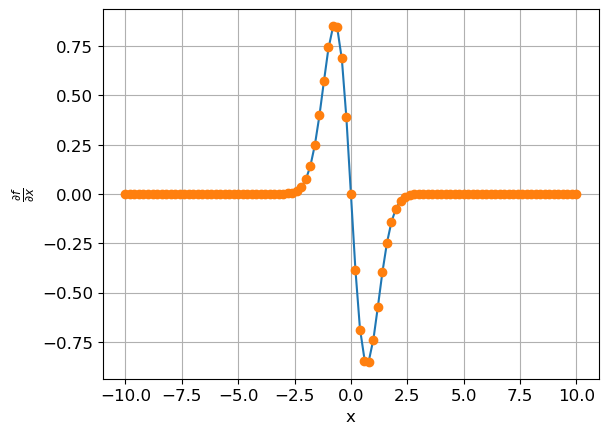

In [2]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams["font.size"] = 12

cut = slice(None, None), N//2, N//2

plt.plot(X[cut], df_dx_exact[cut])
plt.plot(X[cut], np.real(df_dx[cut]), 'o')
plt.xlabel("x")
plt.ylabel(r"$\frac{\partial f}{\partial x}$")
plt.grid()
